In [3]:
import torch
import higher
import time
from torch import nn
from torch.autograd import grad
import torch.nn.functional as F
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import random
#%matplotlib inline
from Lotka_Tasks.MCV_lotka import *

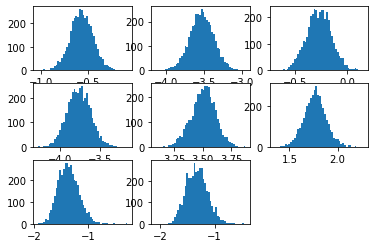

In [4]:
# Experiment
metatraindatasets = torch.load('data_lotka/metadata_lotka.pt')
len(metatraindatasets['X_all'])
metatraindatasets['X_all'][0].size()

# check histograms
import matplotlib.pyplot as plt
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.hist(metatraindatasets['X_all'][-1][:,i].numpy(), bins=50)
plt.show()

metatestdatasets =  torch.load('data_lotka/metatestdata_lotka.pt')

In [7]:
#################
## Experiments ##
#################

In [8]:
ss_lists=[10,20,30,40]
parm_id_lists = [0,1]
MC_Results1 = torch.zeros(len(parm_id_lists),len(ss_lists),2)
MCV_Results1 =  torch.zeros(len(parm_id_lists),len(ss_lists),2)
n_rep=10
MC_data1 = torch.zeros(len(parm_id_lists),len(ss_lists),n_rep, len(metatestdatasets['X_all']))
MCV_data1 = torch.zeros(len(parm_id_lists),len(ss_lists),n_rep, len(metatestdatasets['X_all']))
for i in range(len(parm_id_lists)):
    pid = parm_id_lists[i]
    for j in range(len(ss_lists)):
        print(i,j)
        ss = ss_lists[j]
        torch.manual_seed(0)
        insteps = 1
        inlr = 1e-4
        metalr = 1e-3
        K = ss   #
        inneropt = torch.optim.Adam
        mCV = MetaNeuralCV_lotka(parma_idx=pid,model=MetaNeuralCVModel_lotka, D_in=8,  h_dims=[5]*3, init_val=torch.zeros(1), weight_decay= 5.e-5,\
                                 tasks=metatraindatasets, inner_optim =inneropt, inner_lr=inlr, meta_lr=metalr, K=K, inner_steps=insteps, tasks_per_meta_batch=5)

        mCV.train_val_case2(num_iterations=2000, lotka_ifalluse_allobs=False, ts=None, te=None, meta_val_datasets = None, norm_init_std=1e-2, verbose=False)


        torch.manual_seed(0)
        mCV.test_storedtasks_rep_lotka_case2(metatestdatasets, ts=None, te=None, inner_optim=inneropt, inner_lr=inlr, inner_steps = insteps, n_rep=n_rep, verbose=False) #
        MCV_Results1[i,j,0] = mCV.log_test[0]['Abserr_CVests'].mean()
        MCV_Results1[i,j,1] = mCV.log_test[0]['Abserr_CVests'].std()
        MC_Results1[i,j,0] =mCV.log_test[0]['Abserr_MC_2m_ests'].mean()
        MC_Results1[i,j,1] =mCV.log_test[0]['Abserr_MC_2m_ests'].std()

        MC_data1[i,j,:,:] = mCV.log_test[0]['Abserr_MC_2m_ests']
        MCV_data1[i,j,:,:] = mCV.log_test[0]['Abserr_CVests']
        print(i,j, MC_Results1[i,j,:], MCV_Results1[i,j,:])

0 0
Meta_testing finished.
0 0 tensor([0.0237, 0.0175]) tensor([0.0169, 0.0175])
0 1
Meta_testing finished.
0 1 tensor([0.0166, 0.0138]) tensor([0.0121, 0.0138])
0 2
Meta_testing finished.
0 2 tensor([0.0132, 0.0115]) tensor([0.0101, 0.0113])
0 3
Meta_testing finished.
0 3 tensor([0.0124, 0.0101]) tensor([0.0081, 0.0087])
1 0
Meta_testing finished.
1 0 tensor([0.0297, 0.0239]) tensor([0.0215, 0.0188])
1 1
Meta_testing finished.
1 1 tensor([0.0208, 0.0166]) tensor([0.0148, 0.0134])
1 2
Meta_testing finished.
1 2 tensor([0.0166, 0.0127]) tensor([0.0122, 0.0123])
1 3
Meta_testing finished.
1 3 tensor([0.0140, 0.0108]) tensor([0.0105, 0.0103])


In [10]:
## Save Results
torch.save(MCV_Results1, 'data_lotka/MCV_u1parms.pt')
torch.save(MC_Results1, 'data_lotka/MC_u1parms.pt')

In [11]:
torch.save(MCV_data1, 'data_lotka/MCV_data1.pt')
torch.save(MC_data1, 'data_lotka/MC_data1.pt')

In [12]:
ss_lists=[10,20,30,40]
parm_id_lists = [2,3]
MC_Results2= torch.zeros(len(parm_id_lists),len(ss_lists),2)
MCV_Results2 =  torch.zeros(len(parm_id_lists),len(ss_lists),2)

n_rep=10
MC_data2 = torch.zeros(len(parm_id_lists),len(ss_lists),n_rep, len(metatestdatasets['X_all']))
MCV_data2 = torch.zeros(len(parm_id_lists),len(ss_lists),n_rep, len(metatestdatasets['X_all']))
for i in range(len(parm_id_lists)):
    pid = parm_id_lists[i]
    for j in range(len(ss_lists)):
        print(i,j)
        ss = ss_lists[j]
        torch.manual_seed(0)
        insteps = 1
        inlr = 1e-3
        metalr = 1e-3
        K = ss
        inneropt = torch.optim.Adam
        mCV = MetaNeuralCV_lotka(parma_idx=pid,model=MetaNeuralCVModel_lotka, D_in=8,  h_dims=[3]*3, init_val=torch.zeros(1), weight_decay= 5.e-5,\
                                 tasks=metatraindatasets, inner_optim =inneropt, inner_lr=inlr, meta_lr=metalr, K=K, inner_steps=insteps, tasks_per_meta_batch=5)

        mCV.train_val_case2(num_iterations=2000, lotka_ifalluse_allobs=False, ts=None, te=None, meta_val_datasets = None, norm_init_std=1e-2, verbose=False)


        torch.manual_seed(0)
        mCV.test_storedtasks_rep_lotka_case2(metatestdatasets, ts=None, te=None, inner_optim=inneropt, inner_lr=inlr, inner_steps = insteps, n_rep=10, verbose=False)
        MCV_Results2[i,j,0] = mCV.log_test[0]['Abserr_CVests'].mean()
        MCV_Results2[i,j,1] = mCV.log_test[0]['Abserr_CVests'].std()
        MC_Results2[i,j,0] =mCV.log_test[0]['Abserr_MC_2m_ests'].mean()
        MC_Results2[i,j,1] =mCV.log_test[0]['Abserr_MC_2m_ests'].std()

        MC_data2[i,j,:,:] = mCV.log_test[0]['Abserr_MC_2m_ests']
        MCV_data2[i,j,:,:] = mCV.log_test[0]['Abserr_CVests']
        print(i,j, MC_Results2[i,j,:], MCV_Results2[i,j,:])

0 0
Meta_testing finished.
0 0 tensor([0.0204, 0.0160]) tensor([0.0157, 0.0152])
0 1
Meta_testing finished.
0 1 tensor([0.0149, 0.0111]) tensor([0.0102, 0.0086])
0 2
Meta_testing finished.
0 2 tensor([0.0123, 0.0100]) tensor([0.0111, 0.0107])
0 3
Meta_testing finished.
0 3 tensor([0.0108, 0.0089]) tensor([0.0078, 0.0065])
1 0
Meta_testing finished.
1 0 tensor([0.0286, 0.0230]) tensor([0.0241, 0.0226])
1 1
Meta_testing finished.
1 1 tensor([0.0197, 0.0149]) tensor([0.0145, 0.0121])
1 2
Meta_testing finished.
1 2 tensor([0.0171, 0.0150]) tensor([0.0129, 0.0119])
1 3
Meta_testing finished.
1 3 tensor([0.0147, 0.0122]) tensor([0.0105, 0.0098])


In [14]:
## Save Results
torch.save(MCV_Results2, 'MCV_u2parms.pt')
torch.save(MC_Results2, 'MC_u2parms.pt')

In [15]:
torch.save(MCV_data2, 'MCV_data2.pt')
torch.save(MC_data2, 'MC_data2.pt')